In [ ]:
from statsmodels.tsa.stattools import adfuller
from datetime import datetime, timedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [2]:
import pandas as pd
df_ev = pd.read_csv("electric_bov.csv")

In [4]:
df_ev

,date,registrations
0,2013-01-01,249
1,2013-02-01,236
2,2013-03-01,218
3,2013-04-01,210
4,2013-05-01,226
...,...,...
139,2024-08-01,107136
140,2024-09-01,97456
141,2024-10-01,110509
142,2024-11-01,96293


In [5]:
df_ev.date = pd.to_datetime(df_ev.date)

In [6]:
df_ev.set_index('date', inplace=True)

In [7]:
df_ev = df_ev.asfreq(pd.infer_freq(df_ev.index))

<Axes: xlabel='date'>

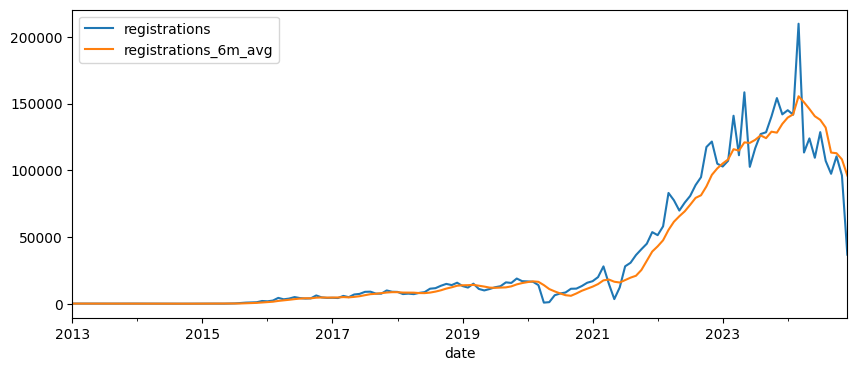

In [19]:
# Smoothing on 6 months average.
df_ev['registrations_6m_avg'] = df_ev['registrations'].rolling(window=6, min_periods=1).mean()
df_ev[['registrations', 'registrations_6m_avg']].plot(figsize=(10,4))

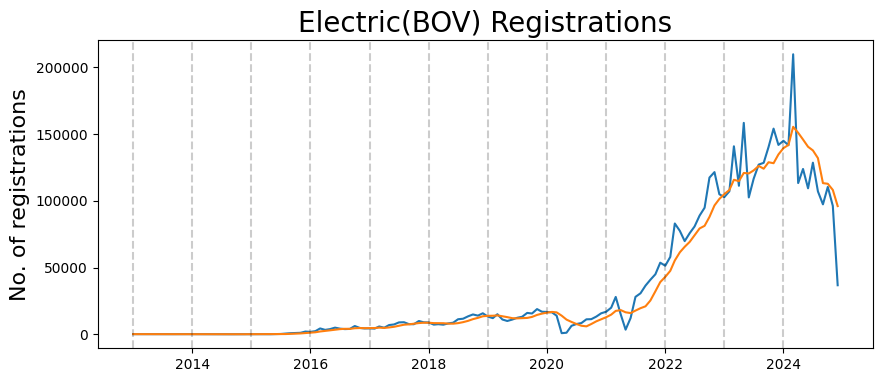

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(df_ev)
plt.title('Electric(BOV) Registrations', fontsize=20)
plt.ylabel('No. of registrations', fontsize=16)
for year in range(2013,2025):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), linestyle='--', color='k', alpha=0.2)

In [21]:
start_date = datetime(2016,1,1)
end_date = datetime(2023,12,1)
ev = df_ev[start_date:end_date]
ev

,registrations,registrations_6m_avg
date,,
2016-01-01,1946,1354.166667
2016-02-01,2498,1652.333333
2016-03-01,4519,2244.166667
2016-04-01,3450,2640.500000
2016-05-01,4002,3099.500000
...,...,...
2023-08-01,127212,126205.166667
2023-09-01,128556,124144.000000
2023-10-01,140385,128981.333333


In [33]:
import numpy as np
mu_reg = np.mean(ev['registrations'])
sigma_reg = np.std(ev['registrations'])
mu_avg = np.mean(ev['registrations_6m_avg'])
sigma_avg = np.std(ev['registrations_6m_avg'])
norm_ev = pd.DataFrame({
    'registrations': (ev['registrations'] - mu_reg) / sigma_reg,
    'registrations_6m_avg': (ev['registrations_6m_avg'] - mu_avg) / sigma_avg
}, index=ev.index)

In [34]:
norm_ev

,registrations,registrations_6m_avg
date,,
2016-01-01,-0.770140,-0.771618
2016-02-01,-0.757625,-0.764172
2016-03-01,-0.711808,-0.749392
2016-04-01,-0.736043,-0.739495
2016-05-01,-0.723529,-0.728033
...,...,...
2023-08-01,2.069730,2.346185
2023-09-01,2.100200,2.294713
2023-10-01,2.368372,2.415512


In [35]:
mu_reg, sigma_reg, mu_avg, sigma_avg

(np.float64(35916.677083333336),
 np.float64(44109.76867394162),
 np.float64(32253.24826388889),
 np.float64(40044.551547329545))

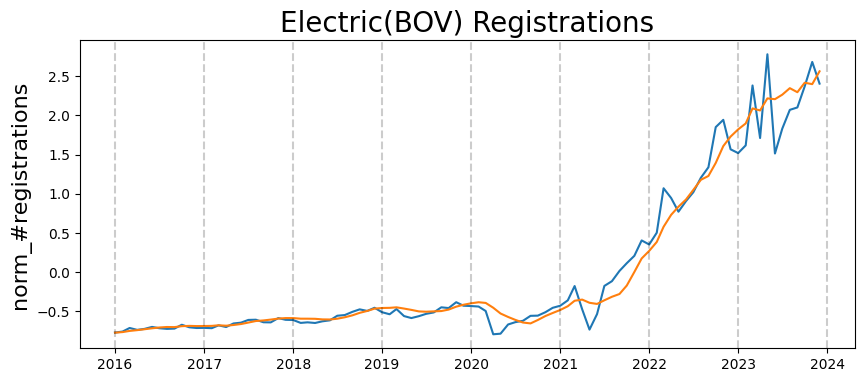

In [36]:
plt.figure(figsize=(10,4))
plt.plot(norm_ev)
# plt.plot(ev)
plt.title('Electric(BOV) Registrations', fontsize=20)
plt.ylabel('norm_#registrations', fontsize=16)
for year in range(2016,2025):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), linestyle='--', color='k', alpha=0.2)

In [37]:
log_ev = np.log(norm_ev + 1)
log_ev

,registrations,registrations_6m_avg
date,,
2016-01-01,-1.470283,-1.476734
2016-02-01,-1.417270,-1.444651
2016-03-01,-1.244128,-1.383867
2016-04-01,-1.331968,-1.345133
2016-05-01,-1.285648,-1.302074
...,...,...
2023-08-01,1.121590,1.207821
2023-09-01,1.131467,1.192319
2023-10-01,1.214429,1.228327


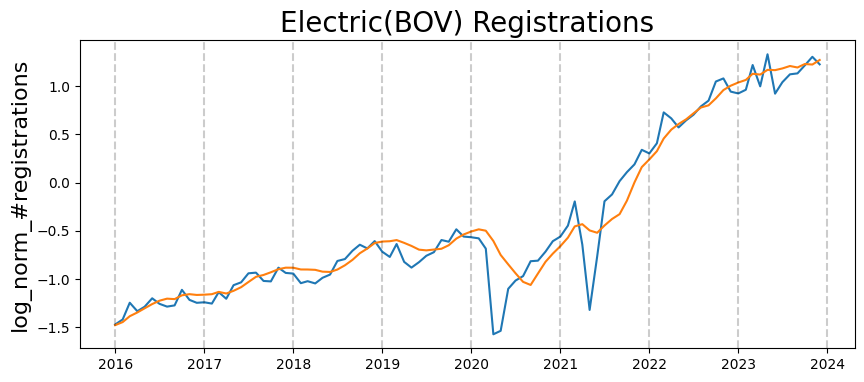

In [38]:
plt.figure(figsize=(10,4))
plt.plot(log_ev)
plt.title('Electric(BOV) Registrations', fontsize=20)
plt.ylabel('log_norm_#registrations', fontsize=16)
for year in range(2016,2025):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), linestyle='--', color='k', alpha=0.2)

In [39]:
log_ev[:datetime(2016,3,1)] 

,registrations,registrations_6m_avg
date,,
2016-01-01,-1.470283,-1.476734
2016-02-01,-1.417270,-1.444651
2016-03-01,-1.244128,-1.383867


In [40]:
first_diff_ev = log_ev.diff()[1:]

In [41]:
first_diff_ev.describe()

,registrations,registrations_6m_avg
count,95.000000,95.000000
mean,0.028371,0.028914
std,0.189688,0.054301
min,-0.887021,-0.144834
25%,-0.033809,-0.001736
50%,0.046309,0.030672
75%,0.099226,0.057215
max,0.571824,0.189150


In [42]:
first_diff_ev

,registrations,registrations_6m_avg
date,,
2016-02-01,0.053012,0.032082
2016-03-01,0.173143,0.060785
2016-04-01,-0.087841,0.038733
2016-05-01,0.046321,0.043060
2016-06-01,0.087489,0.043936
...,...,...
2023-08-01,0.081430,0.025186
2023-09-01,0.009877,-0.015502
2023-10-01,0.082963,0.036008


# First Analysis: Anomaly Detection and Removal

In [43]:
from statsmodels.tsa.seasonal import STL

In [53]:
df1 = pd.DataFrame({
    'registrations': first_diff_ev.registrations
}, index=first_diff_ev.index)
df1

,registrations
date,
2016-02-01,0.053012
2016-03-01,0.173143
2016-04-01,-0.087841
2016-05-01,0.046321
2016-06-01,0.087489
...,...
2023-08-01,0.081430
2023-09-01,0.009877
2023-10-01,0.082963


In [54]:

stl = STL(df1.registrations)
result = stl.fit()

In [55]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

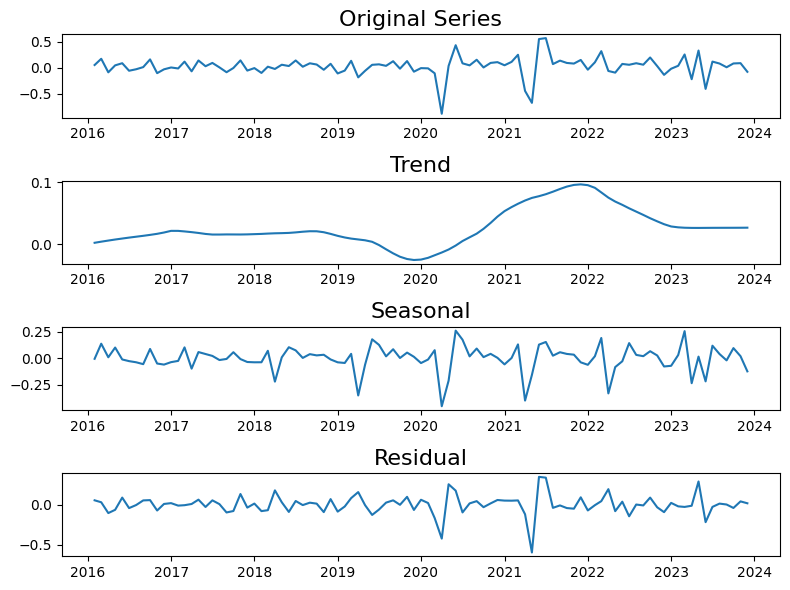

In [56]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(df1)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

Text(0.5, 1.0, 'Trend+Seasonal Component')

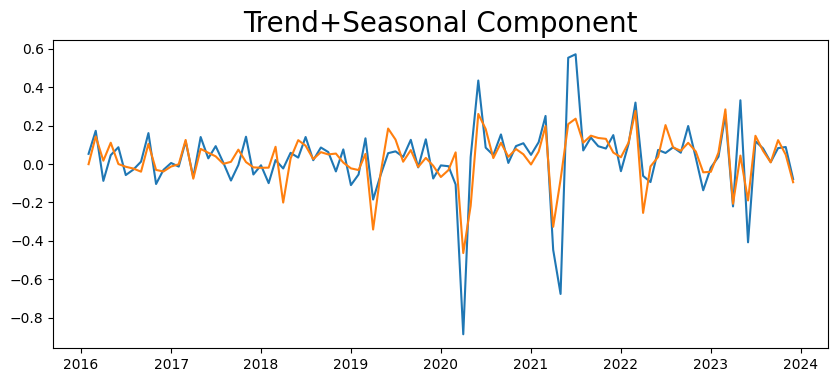

In [57]:
estimated = trend + seasonal
plt.figure(figsize=(10,4))
plt.plot(df1)
plt.plot(estimated)
plt.title("Trend+Seasonal Component", fontsize=20)

In [58]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

(np.float64(16801.0), np.float64(19723.0))

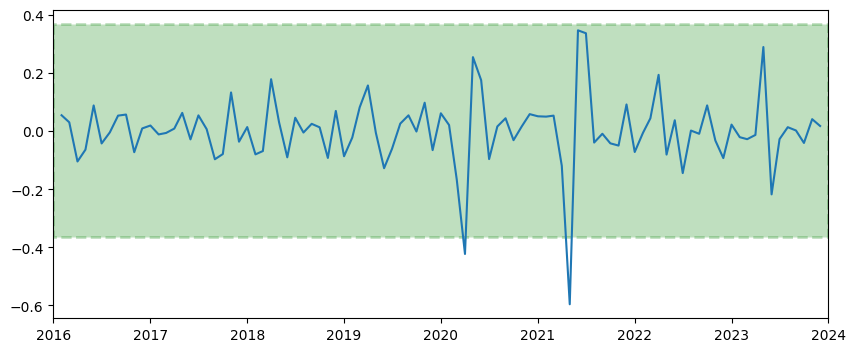

In [59]:
plt.figure(figsize=(10,4))
plt.plot(resid)

plt.fill_between([datetime(2016,1,1), datetime(2024,1,1)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(2016,1,1), datetime(2024,1,1))

In [61]:
anomalies = df1[(resid < lower) | (resid > upper)]
anomalies

,registrations
date,
2020-04-01,-0.887021
2021-05-01,-0.676951


Text(0.5, 1.0, 'Anomaly 1')

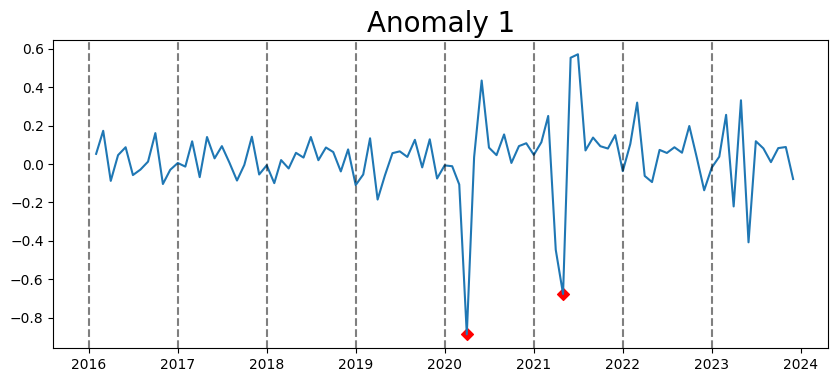

In [62]:
plt.figure(figsize=(10,4))
plt.plot(df1)
for year in range(2016,2024):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(anomalies.index, anomalies.registrations, color='r', marker='D')
plt.title('Anomaly 1', fontsize=20)

In [63]:
train_end = datetime(2022,12,1)
test_end = datetime(2023,12,1)

train_data = df1[:train_end]
test_data = df1[train_end + timedelta(days=1): test_end]

In [64]:
april_data = train_data[train_data.index.month==4]
may_data = train_data[train_data.index.month==5]

In [65]:
april_data

,registrations
date,
2016-04-01,-0.087841
2017-04-01,-0.068423
2018-04-01,-0.023112
2019-04-01,-0.185108
2020-04-01,-0.887021
2021-04-01,-0.446959
2022-04-01,-0.062019


In [66]:
adjusted_data = df1.copy()
for curr_anomaly in anomalies.index:
    if curr_anomaly.month == 4:
        adjusted_data.loc[curr_anomaly] = april_data[(april_data.index != curr_anomaly) & (april_data.index < test_data.index[0])].mean()
    else:
        adjusted_data.loc[curr_anomaly] = may_data[(may_data.index != curr_anomaly) & (may_data.index < test_data.index[0])].mean()
        
adjusted_data

,registrations
date,
2016-02-01,0.053012
2016-03-01,0.173143
2016-04-01,-0.087841
2016-05-01,0.046321
2016-06-01,0.087489
...,...
2023-08-01,0.081430
2023-09-01,0.009877
2023-10-01,0.082963


In [67]:
print(adjusted_data.loc[datetime(2020,4,1)])
print(adjusted_data.loc[datetime(2021,5,1)])

registrations   -0.145577
Name: 2020-04-01 00:00:00, dtype: float64
registrations    0.02134
Name: 2021-05-01 00:00:00, dtype: float64


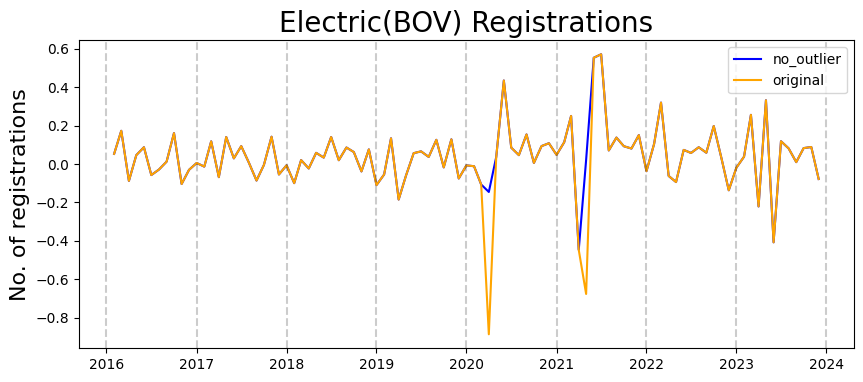

In [68]:
plt.figure(figsize=(10,4))
plt.plot(adjusted_data, color = 'b', label='no_outlier')
plt.plot(df1, color ='orange', label='original')
plt.title('Electric(BOV) Registrations', fontsize=20)
plt.legend()
plt.ylabel('No. of registrations', fontsize=16)
for year in range(2016,2025):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), linestyle='--', color='k', alpha=0.2)

In [69]:
stl2 = STL(adjusted_data.registrations)
result2 = stl2.fit()
seasonal, trend, resid = result2.seasonal, result2.trend, result2.resid
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

(np.float64(16801.0), np.float64(19723.0))

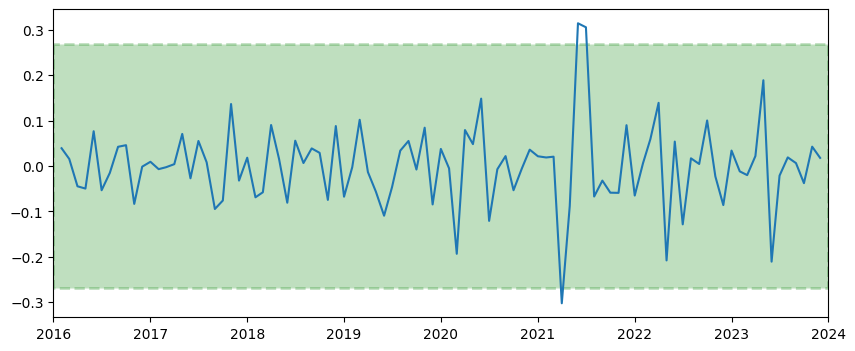

In [70]:
plt.figure(figsize=(10,4))
plt.plot(resid)

plt.fill_between([datetime(2016,1,1), datetime(2024,1,1)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(2016,1,1), datetime(2024,1,1))

In [71]:
anomalies = adjusted_data[(resid < lower) | (resid > upper)]
anomalies

,registrations
date,
2021-04-01,-0.446959
2021-06-01,0.553710
2021-07-01,0.571824


Text(0.5, 1.0, 'Anomaly 2')

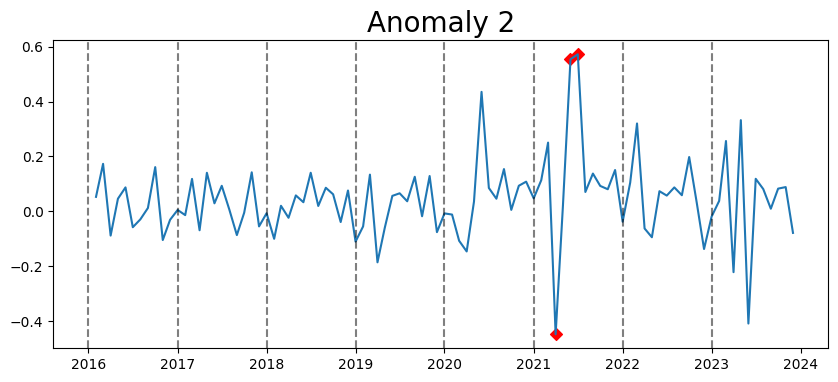

In [72]:
plt.figure(figsize=(10,4))
plt.plot(adjusted_data)
for year in range(2016,2024):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(anomalies.index, anomalies.registrations, color='r', marker='D')
plt.title('Anomaly 2', fontsize=20)

In [73]:
train_data = adjusted_data[:train_end]
test_data = adjusted_data[train_end + timedelta(days=1): test_end]

In [74]:
april_data = train_data[train_data.index.month==4]
june_data = train_data[train_data.index.month==6]
july_data = train_data[train_data.index.month==7]

In [75]:
adjusted_data2 = adjusted_data.copy()
for curr_anomaly in anomalies.index:
    if curr_anomaly.month == 4:
        adjusted_data2.loc[curr_anomaly] = april_data[(april_data.index != curr_anomaly) & (april_data.index < test_data.index[0])].mean()
    elif curr_anomaly.month == 6:
        adjusted_data2.loc[curr_anomaly] = june_data[(june_data.index != curr_anomaly) & (june_data.index < test_data.index[0])].mean()
    elif curr_anomaly.month == 7:
        adjusted_data2.loc[curr_anomaly] = july_data[(july_data.index != curr_anomaly) & (july_data.index < test_data.index[0])].mean()
adjusted_data2

,registrations
date,
2016-02-01,0.053012
2016-03-01,0.173143
2016-04-01,-0.087841
2016-05-01,0.046321
2016-06-01,0.087489
...,...
2023-08-01,0.081430
2023-09-01,0.009877
2023-10-01,0.082963


In [76]:
print(adjusted_data2.loc[datetime(2020,4,1)])
print(adjusted_data2.loc[datetime(2021,5,1)])

registrations   -0.145577
Name: 2020-04-01 00:00:00, dtype: float64
registrations    0.02134
Name: 2021-05-01 00:00:00, dtype: float64


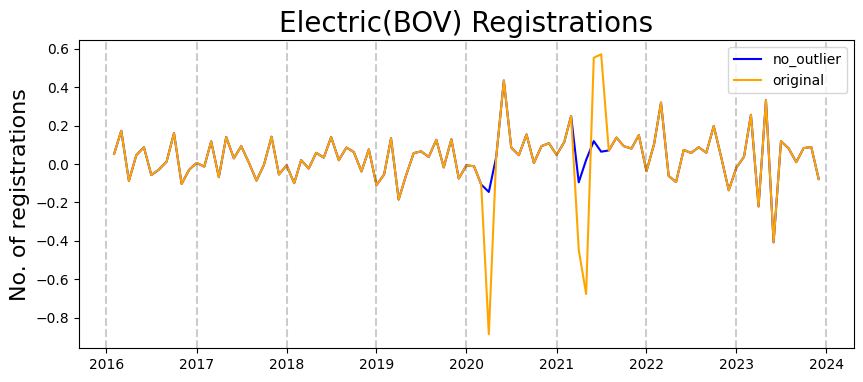

In [78]:
plt.figure(figsize=(10,4))
plt.plot(adjusted_data2, color = 'b', label='no_outlier')
plt.plot(df1, color ='orange', label='original')
plt.title('Electric(BOV) Registrations', fontsize=20)
plt.legend()
plt.ylabel('No. of registrations', fontsize=16)
for year in range(2016,2025):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), linestyle='--', color='k', alpha=0.2)

In [79]:
def adfuller_test(dframe):
    result = adfuller(dframe)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

In [83]:
training_data = adjusted_data2[:train_end]
testing_data = adjusted_data2[train_end + timedelta(days=1): test_end]

In [84]:
training_data

,registrations
date,
2016-02-01,0.053012
2016-03-01,0.173143
2016-04-01,-0.087841
2016-05-01,0.046321
2016-06-01,0.087489
...,...
2022-08-01,0.087399
2022-09-01,0.058945
2022-10-01,0.198075


In [85]:
adfuller_test(training_data)

ADF Test Statistic : -8.86630443428243
p-value : 1.437352804958649e-14
#Lags Used : 0
Number of Observations Used : 82


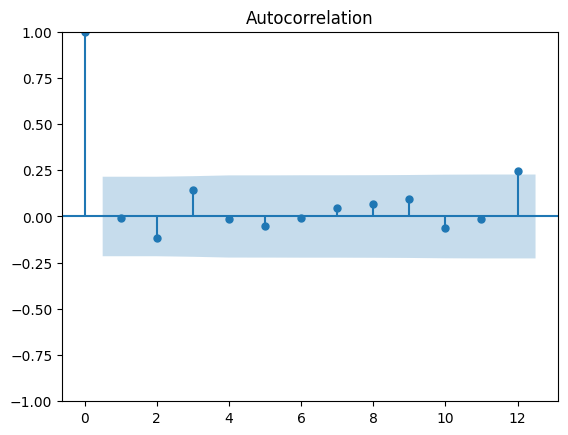

In [86]:
acf_plot = plot_acf(training_data, lags=12)

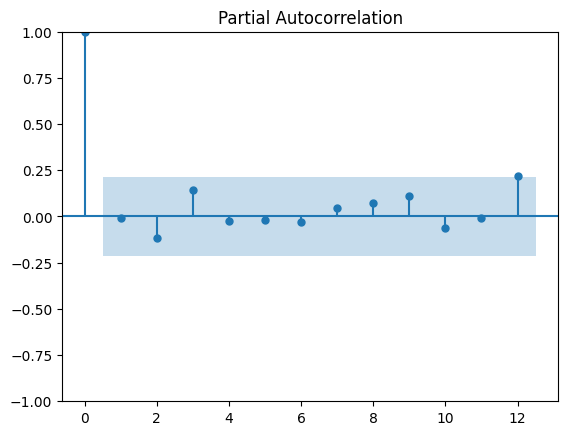

In [87]:
pacf_plot = plot_pacf(training_data, lags=12)

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [98]:
my_order = (0,0,0) # (0, 0, 12),(0,0,1),(1,0,1),(0,0,0)
my_seasonal_order= (0,0,1,12) # (1,0,0,12), (1,0,0,12),(1,0,0,12),(1,0,0,12)
model = SARIMAX(training_data, order= my_order, seasonal_order=my_seasonal_order)

In [99]:
start = time()
model_fit = model.fit()
end = time()
print('model training time: ', end-start)

model training time:  0.06336736679077148


In [100]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:              registrations   No. Observations:                   83
Model:             SARIMAX(0, 0, [1], 12)   Log Likelihood                  70.354
Date:                    Sat, 30 Aug 2025   AIC                           -136.707
Time:                            22:53:40   BIC                           -131.870
Sample:                        02-01-2016   HQIC                          -134.764
                             - 12-01-2022                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.3244      0.088      3.668      0.000       0.151       0.498
sigma2         0.0106      0.001      9.668      0.000       0.008       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                22.99
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                             0.74
Prob(H) (two-sided):                  0.09   Kurtosis:                         5.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [102]:
predictions = model_fit.predict(start= pred_start_date, end= pred_end_date)

In [103]:
predictions = pd.DataFrame(predictions)

In [104]:
predictions

,predicted_mean
2023-01-01,-0.016188
2023-02-01,0.022001
2023-03-01,0.072347
2023-04-01,-0.013040
2023-05-01,-0.030778
2023-06-01,0.025668
2023-07-01,0.014510
2023-08-01,0.022133
2023-09-01,0.008897
2023-10-01,0.055160


In [105]:
predictions.index = predictions.index.rename('date')

In [106]:
residuals = test_data.registrations - predictions.predicted_mean

In [107]:
residuals

date
2023-01-01   -0.002727
2023-02-01    0.016248
2023-03-01    0.183895
2023-04-01   -0.207917
2023-05-01    0.362965
2023-06-01   -0.433554
2023-07-01    0.104261
2023-08-01    0.059296
2023-09-01    0.000979
2023-10-01    0.027803
2023-11-01    0.085314
2023-12-01   -0.022737
Freq: MS, dtype: float64

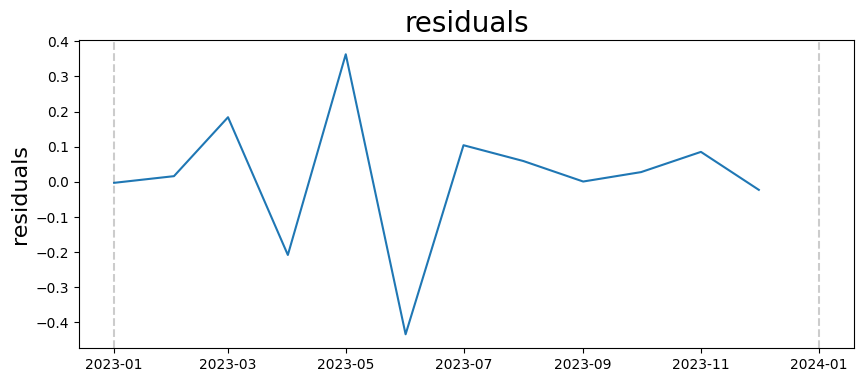

In [108]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('residuals', fontsize=20)
plt.ylabel('residuals', fontsize=16)
for year in range(2023,2025):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), linestyle='--', color='k', alpha=0.2)

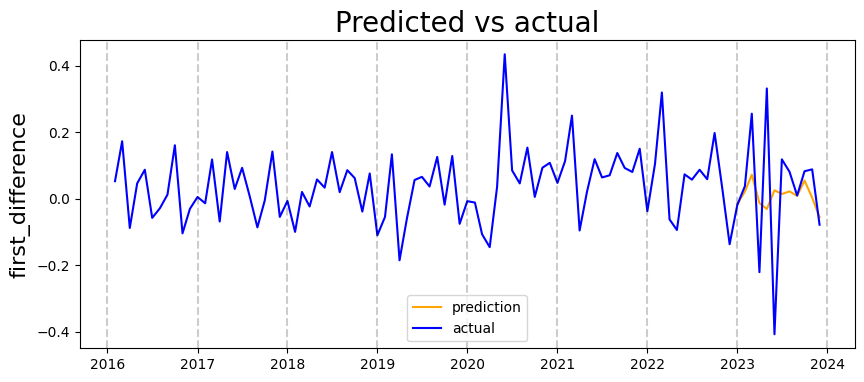

In [112]:
plt.figure(figsize=(10,4))
plt.plot(predictions, color = 'orange', label='prediction')
plt.plot(adjusted_data2, color ='b', label='actual')
plt.legend()
plt.title('Predicted vs actual', fontsize=20)
plt.ylabel('first_difference', fontsize=16)
for year in range(2016,2025):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), linestyle='--', color='k', alpha=0.2)

In [233]:
def undo_transformations(predictions, series, mu, sigma):
    first_pred = sigma*(np.exp(predictions.predicted_mean[0] + np.log(((series.iloc[-1]-mu)/sigma)+1))-1) + mu
    orig_predictions = [first_pred-36662.97751618197]
    
    for i in range(len(predictions)-1):
        next_pred = sigma*(np.exp(predictions.predicted_mean[i+1] + np.log(((orig_predictions[-1]-mu)/sigma)+1))-1) + mu
        orig_predictions.append(next_pred)
    
    return np.array(orig_predictions).flatten()

In [ ]:
ev_df1 = pd.DataFrame({
    'registrations': ev.registrations
}, index= ev.index)
orig_pred= undo_transformations(predictions, ev_df1, mu_reg, sigma_reg)

C:\Users\aadit\AppData\Local\Temp\ipykernel_28256\2136899860.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_pred = sigma*(np.exp(predictions.predicted_mean[0] + np.log(((series.iloc[-1]-mu)/sigma)+1))-1) + mu
C:\Users\aadit\AppData\Local\Temp\ipykernel_28256\2136899860.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  next_pred = sigma*(np.exp(predictions.predicted_mean[i+1] + np.log(((orig_predictions[-1]-mu)/sigma)+1))-1) + mu


In [138]:
orig_pred

array([102885.        , 105355.92875878, 113875.33298884, 112293.93844264,
       108642.13317108, 111679.89693862, 113431.94995723, 116153.90290286,
       117265.19662304, 124379.94255533, 124821.36245455, 117657.39822984])

In [140]:
test_data.index

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='date', freq='MS')

Text(0, 0.5, 'No. of Registrations')

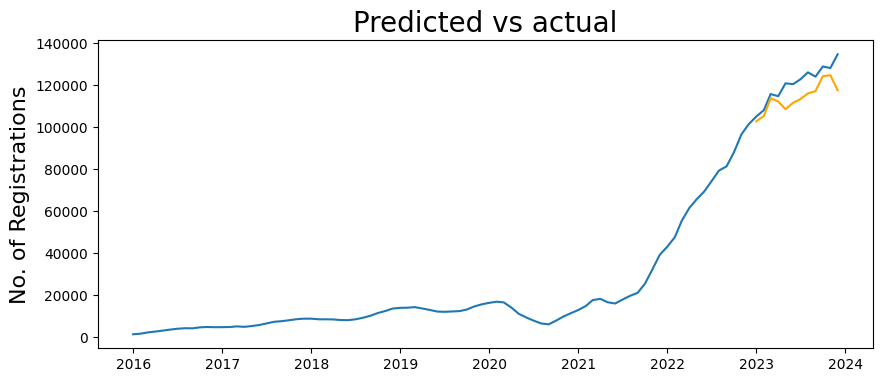

In [141]:
plt.figure(figsize=(10,4))
plt.plot(ev.drop(columns=["registrations"], axis=1), label="actual")
plt.plot(test_data.index, orig_pred, color='orange', label="prediction")
plt.title('Predicted vs actual', fontsize=20)
plt.ylabel('No. of Registrations', fontsize=16)

In [147]:
orig_test_data = ev[train_end + timedelta(days=1): test_end]

In [148]:
orig_test_data

,registrations,registrations_6m_avg
date,,
2023-01-01,102885,105151.666667
2023-02-01,107216,108185.666667
2023-03-01,140923,115853.833333
2023-04-01,111361,114830.666667
2023-05-01,158467,120976.333333
2023-06-01,102645,120582.833333
2023-07-01,116623,122872.500000
2023-08-01,127212,126205.166667
2023-09-01,128556,124144.000000


In [149]:
orig_residuals = orig_test_data.registrations - orig_pred

In [150]:
orig_residuals

date
2023-01-01        0.000000
2023-02-01     1860.071241
2023-03-01    27047.667011
2023-04-01     -932.938443
2023-05-01    49824.866829
2023-06-01    -9034.896939
2023-07-01     3191.050043
2023-08-01    11058.097097
2023-09-01    11290.803377
2023-10-01    16005.057445
2023-11-01    29334.637545
2023-12-01    24301.601770
Freq: MS, Name: registrations, dtype: float64

In [151]:
print('Mean Absolute Percentage Error:', round(np.mean(abs(orig_residuals/orig_test_data.registrations)),4))

Mean Absolute Percentage Error: 0.1081


# Second Analysis: Smoothing

In [154]:
df2 = pd.DataFrame({
    "registrations_6m_avg": first_diff_ev.registrations_6m_avg
}, index=first_diff_ev.index)
df2.head()

,registrations_6m_avg
date,
2016-02-01,0.032082
2016-03-01,0.060785
2016-04-01,0.038733
2016-05-01,0.043060
2016-06-01,0.043936


In [156]:
train_data = df2[:train_end]
test_data = df2[train_end + timedelta(days=1): test_end]

In [158]:
adfuller_test(train_data)

ADF Test Statistic : -1.9305809788984474
p-value : 0.3178143943123546
#Lags Used : 6
Number of Observations Used : 76


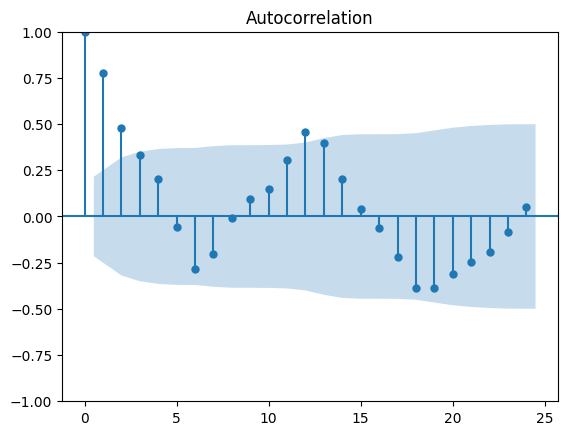

In [288]:
acf_plot = plot_acf(train_data, lags=24)

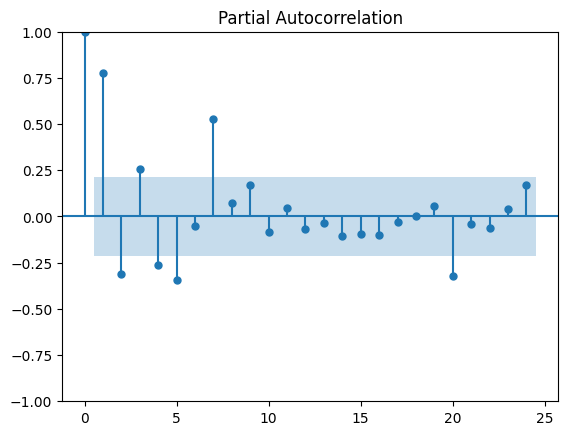

In [289]:
pacf_plot = plot_pacf(train_data, lags=24)

In [309]:
my_order = (2,0,2) # (0, 0, 12),(0,0,1),(1,0,1),(0,0,0)
my_seasonal_order= (1,0,1,6) # (1,0,0,12), (1,0,0,12),(1,0,0,12),(1,0,0,12)
model = SARIMAX(train_data, order= my_order, seasonal_order=my_seasonal_order)

In [310]:
start = time()
model_fit = model.fit()
end = time()
print('model training time: ', end-start)

model training time:  0.3549764156341553


c:\Users\aadit\Desktop\combined projects\tsa\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [311]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                registrations_6m_avg   No. Observations:                   83
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 6)   Log Likelihood                 185.563
Date:                             Sat, 30 Aug 2025   AIC                           -357.126
Time:                                     23:53:09   BIC                           -340.194
Sample:                                 02-01-2016   HQIC                          -350.324
                                      - 12-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8579      0.470      1.826      0.068      -0.063       1.779
ar.L2          0.0768      0.419      0.183      0.854      -0.744       0.897
ma.L1          0.2216      0.440      0.503      0.615      -0.641       1.085
ma.L2         -0.2644      0.161     -1.647      0.100      -0.579       0.050
ar.S.L6       -0.7414      0.118     -6.308      0.000      -0.972      -0.511
ma.S.L6        0.1498      0.183      0.817      0.414      -0.210       0.509
sigma2         0.0006      0.000      5.875      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.32
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               3.95   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [312]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [313]:
predictions = model_fit.predict(start= pred_start_date, end= pred_end_date)

In [314]:
predictions = pd.DataFrame(predictions)

In [315]:
predictions

,predicted_mean
2023-01-01,0.026350
2023-02-01,0.031014
2023-03-01,0.053918
2023-04-01,0.016421
2023-05-01,0.000989
2023-06-01,0.021750
2023-07-01,0.032604
2023-08-01,0.027054
2023-09-01,0.006969
2023-10-01,0.031944


In [316]:
predictions.index = predictions.index.rename('date')

In [317]:
residuals = test_data.registrations_6m_avg - predictions.predicted_mean
residuals

date
2023-01-01    0.006666
2023-02-01   -0.004505
2023-03-01    0.010106
2023-04-01   -0.024731
2023-05-01    0.047914
2023-06-01   -0.024811
2023-07-01   -0.014925
2023-08-01   -0.001869
2023-09-01   -0.022471
2023-10-01    0.004064
2023-11-01   -0.045990
2023-12-01    0.024205
Freq: MS, dtype: float64

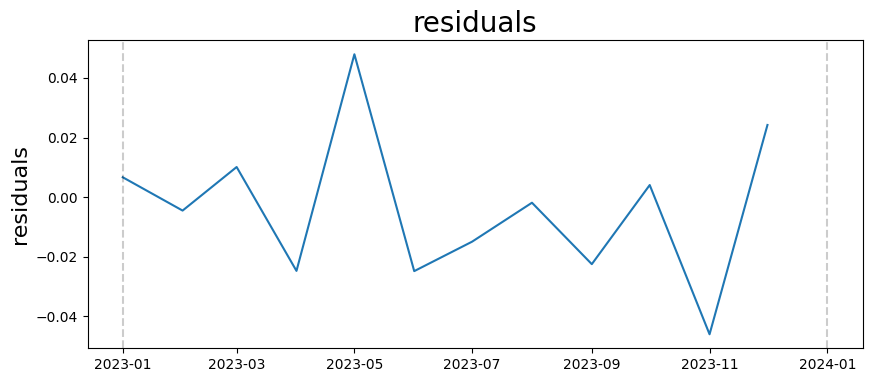

In [318]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('residuals', fontsize=20)
plt.ylabel('residuals', fontsize=16)
for year in range(2023,2025):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), linestyle='--', color='k', alpha=0.2)

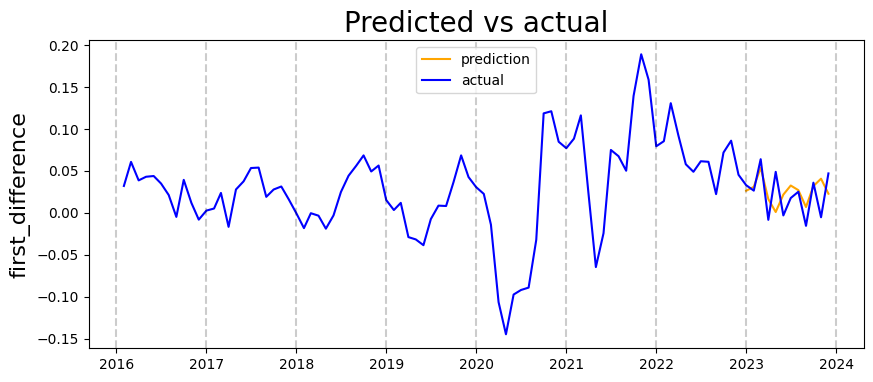

In [319]:
plt.figure(figsize=(10,4))
plt.plot(predictions, color = 'orange', label='prediction')
plt.plot(df2, color ='b', label='actual')
plt.legend()
plt.title('Predicted vs actual', fontsize=20)
plt.ylabel('first_difference', fontsize=16)
for year in range(2016,2025):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), linestyle='--', color='k', alpha=0.2)

In [321]:
ev_df2 = pd.DataFrame({
    'registrations_6m_avg': ev.registrations_6m_avg
}, index= ev.index)
orig_pred= undo_transformations(predictions, ev_df2.registrations_6m_avg, mu_avg, sigma_avg)

C:\Users\aadit\AppData\Local\Temp\ipykernel_28256\2136899860.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_pred = sigma*(np.exp(predictions.predicted_mean[0] + np.log(((series.iloc[-1]-mu)/sigma)+1))-1) + mu
C:\Users\aadit\AppData\Local\Temp\ipykernel_28256\2136899860.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  next_pred = sigma*(np.exp(predictions.predicted_mean[i+1] + np.log(((orig_predictions[-1]-mu)/sigma)+1))-1) + mu


In [322]:
orig_pred

array([101959.79604474, 105416.95954246, 111688.52523862, 113666.71050934,
       113786.87989522, 116460.21014173, 120578.01549723, 124098.37160246,
       125020.70776144, 129331.74694747, 135031.12269127, 138329.40465787])

In [323]:
orig_test_data

,registrations,registrations_6m_avg
date,,
2023-01-01,102885,105151.666667
2023-02-01,107216,108185.666667
2023-03-01,140923,115853.833333
2023-04-01,111361,114830.666667
2023-05-01,158467,120976.333333
2023-06-01,102645,120582.833333
2023-07-01,116623,122872.500000
2023-08-01,127212,126205.166667
2023-09-01,128556,124144.000000


In [324]:
orig_residuals = orig_test_data.registrations - orig_pred

In [325]:
orig_residuals

date
2023-01-01      925.203955
2023-02-01     1799.040458
2023-03-01    29234.474761
2023-04-01    -2305.710509
2023-05-01    44680.120105
2023-06-01   -13815.210142
2023-07-01    -3955.015497
2023-08-01     3113.628398
2023-09-01     3535.292239
2023-10-01    11053.253053
2023-11-01    19124.877309
2023-12-01     3629.595342
Freq: MS, Name: registrations, dtype: float64

In [326]:
print('Mean Absolute Percentage Error:', round(np.mean(abs(orig_residuals/orig_test_data.registrations)),4))

Mean Absolute Percentage Error: 0.0821


Text(0, 0.5, 'No. of Registrations')

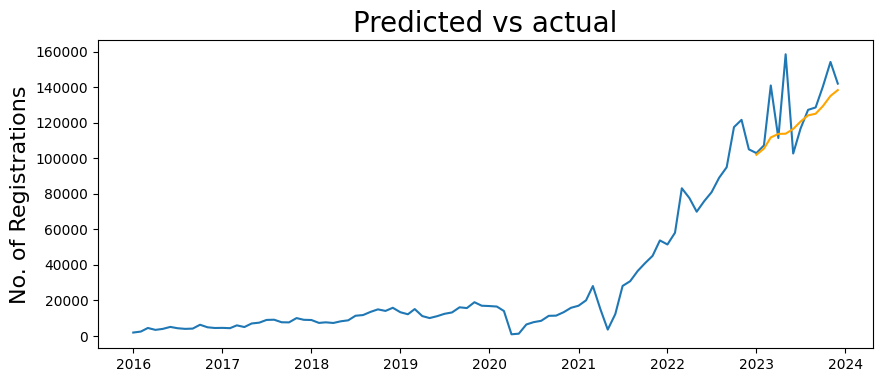

In [327]:
plt.figure(figsize=(10,4))
plt.plot(ev.registrations, label="actual")
plt.plot(test_data.index, orig_pred, color='orange', label="prediction")
plt.title('Predicted vs actual', fontsize=20)
plt.ylabel('No. of Registrations', fontsize=16)